### Problem 1 - Chicago Crime Data (25 points)

The Chicago Crime Data reflects the crime incidents that occured in the city of Chicago during 2016 and 2017. The data is provided in the `chicago_crime_data_v2.csv` file. For each crime incident, there is information regarding the case ID, crime location, description, primary crime type ID, coordinates of the crime etc. To identify the primary crime type (denoted by the `Primary type` variable), the `primary_type_ID.csv` file is provided which maps the primary crime type to their corresponding ID.

For this problem, the goal is to identify the crime types that have occurred more than 10,000 times during the years 2016 and 2017. For this,

1. Import the CSV files as dataframes using pandas.

2. Sort the crime data file by crime ID and merge the two files by `Primary Type ID` variable. 

3. Identify the crime types that have a frequency >10,000 and list them as `High Frequency Crime Types`. Provide a timeseries plot for all `High Frequency Crime Types`. For this, compute the number of crimes that occur per each crime type per month (2016 Jan - 2017 Dec). Use the `series.plot` method in Pandas for Series objects. 

4. Using the code provided below, plot all the crimes that come under `High Frequency Crime Types` on a map of Chicago. For this, use the location information provided in the data. For any crimes with missing location coordinates, sort the data by ascending `Date` and use forward fill.  

(Make sure that each data point must be plotted as a transparent circular dots with a markersize of atleast 20 and alpha set to atmost 0.5 (transparency))


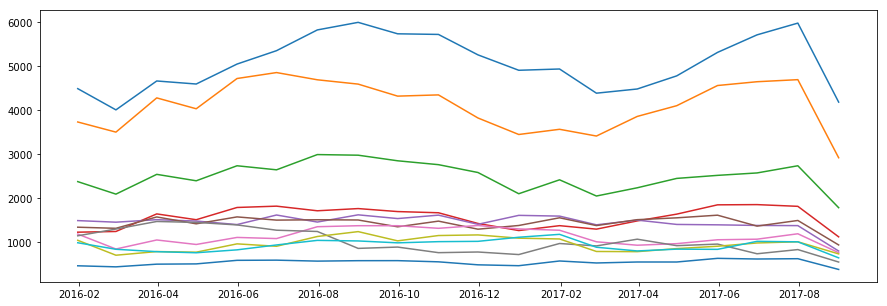

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df1 = pd.read_csv('C:/Users/harik/Desktop/python hw/hw3/chicago_crime_data.csv')
df2= pd.read_csv('C:/Users/harik/Desktop/python hw/hw3/primary_type_id.csv')

#sorting data file by crime id and merging two files by primary id
final_df1 =df1.sort_values(['Crime_ID'], ascending=True)
merged = final_df1.merge(df2, on='Primary Type ID')

a={}
a=merged['Primary Type ID'].value_counts()


df3 = pd.DataFrame(data=a)
df3.columns = ['count']
df3['Primary Type ID']=df3.index
df3 = df3.reset_index(drop=True)

#crimetypes that have frequency greater than 10,000.

crimefreq = df3['count'] > 10000

df3[crimefreq]
df3['Crime_Freq_High'] = crimefreq

final_merge= merged.merge(df3, on='Primary Type ID')
final_merge

#listed them as high frequency crime in a dataframe
df4=final_merge.loc[final_merge['Crime_Freq_High']==True]
df5=pd.DataFrame(df4)


#Timeseries plot

list = df3[crimefreq]['Primary Type ID']


df5['Date']=pd.to_datetime(df5['Date'])
df5.index = df5['Date']
plt.figure(figsize=(15,5))
for i in list:
    x=(df5['Primary Type ID']==i).resample('M').sum()
    plt.plot(x)


In [19]:
df3[crimefreq]

,count,Primary Type ID,Crime_Freq_High
0,101246,32,True
1,81995,3,True
2,49746,7,True
3,31143,2,True
4,28994,9,True
5,28597,25,True
6,22524,4,True
7,20184,18,True
8,19076,29,True
9,18505,17,True


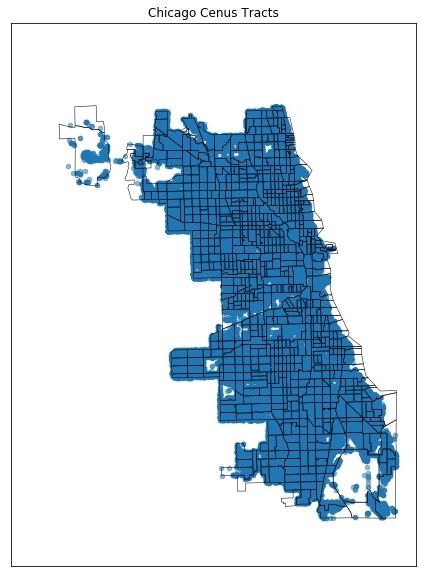

In [6]:
###########################################################
##################  Base MAP  #############################
###########################################################

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df1 = pd.read_csv('C:/Users/harik/Desktop/python hw/hw3/chicago_crime_data.csv')
df2= pd.read_csv('C:/Users/harik/Desktop/python hw/hw3/primary_type_id.csv')

#sorting data file by crime id and merging two files by primary id
final_df1 =df1.sort_values(['Crime_ID'], ascending=True)
merged = final_df1.merge(df2, on='Primary Type ID')

a={}
a=merged['Primary Type ID'].value_counts()


df3 = pd.DataFrame(data=a)
df3.columns = ['count']
df3['Primary Type ID']=df3.index
df3 = df3.reset_index(drop=True)

#crimetypes that have frequency greater than 10,000.

crimefreq = df3['count'] > 10000

df3[crimefreq]
df3['Crime_Freq_High'] = crimefreq

final_merge= merged.merge(df3, on='Primary Type ID')
final_merge

#listed them as high frequency crime in a dataframe
df4=final_merge.loc[final_merge['Crime_Freq_High']==True]
df5=pd.DataFrame(df4)


#Timeseries plot

list = df3[crimefreq]['Primary Type ID']


#sorted the data by ascending Date and using forward fill.
final_dfmap =df5.sort_values(['Date'], ascending=True)
final_dfmap

final_dfmap['Location'] = final_dfmap['Location'].ffill()
final_dfmap['Latitude'] = final_dfmap['Latitude'].ffill()
final_dfmap['Longitude'] = final_dfmap['Longitude'].ffill()

final_dfmap

dflist_lat=final_dfmap['Latitude'].tolist()
dflist_lon=final_dfmap['Longitude'].tolist()
dflist_loc=final_dfmap['Location'].tolist()

from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[16,10])
m = Basemap(projection='merc',llcrnrlat=41.60,urcrnrlat=42.10,\
        llcrnrlon=-88.0,urcrnrlon=-87.50,lat_ts=20,resolution='c')
m.readshapefile('C:/Users/harik/Desktop/python hw/hw3/geo_export_0e3da441-8fe8-4e11-9ca0-42ef75cab68e','chicago')


x,y = m(dflist_lon, dflist_lat)
plt.scatter(x,y,alpha=0.5,s=20)
plt.title("Chicago Cenus Tracts")
plt.show()


### Problem 2 - Benchmarking Problem (25 Points)

Numpy has in-built universal functions that allow operations on multidimentional arrays. For this problem, you will be asked to test the performance of some of this functions.

For this, create an `NxN` matrix `A` and an array `B` of size `N`, with random entries (use `numpy.random`). Using `A` and `B` as inputs, performing the following operations: (compare and time the performance of sorting algorithms with and without numpy ufunc)

1. Sorting `B` (you can use `numpy.sort`) for `N` ranging from 1000 to 25000 (take steps of 1000)
2. Computing Determinant of `A` ( you can use `numpy.linalg.det` to compute the determinant of the matrix) for `N` ranging from 100 to 800 (take steps of 50)
3. Matrix Multiplication of `A*A` ( use `numpy.matmul`) for `N` ranging from 100 to 1500 

Plot the operation times for Numpy functions vs regular python commands for each operation.

The final output must include 3 plots comparing the performance of universal functions in Numpy with similar analogs in python for each operation. Provide a breif interpretation from the plots. (Feel free to test around the range of `N` for this problem).

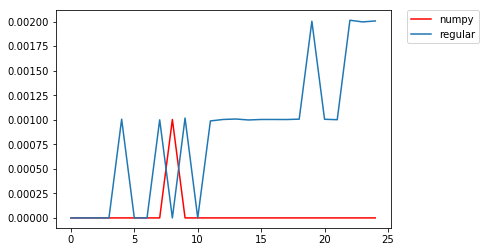

In [3]:
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

B={}
C={}
x=1

for i in range(1000,26000,1000):
    B[x]= np.random.randint(-1000000, 1000000, i)
    x+=1

timelist = []

#sort using numpy
for i in range(1,26,1):
    s1=time.time()
    C[i] = np.sort(B[1], axis=None)
    e1=time.time()
    timelist.append(e1-s1)

tlist=[]

#sort using regular method
for i in range(1,26,1):
    s2=time.time()
    B[i].sort()    
    e2=time.time()
    tlist.append(e2-s2)


x=list(range(0,25))
plt.plot(x,timelist,color='r',label="numpy")
plt.plot(x,tlist,label="regular")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



SORTING:
From the above graph we can observe that numpy.sort takes very less time compare to the regular sorting method.
However big the array may be, numpy sorts the array in fraction of a second whereas regular sorting takes time for larger arrays.

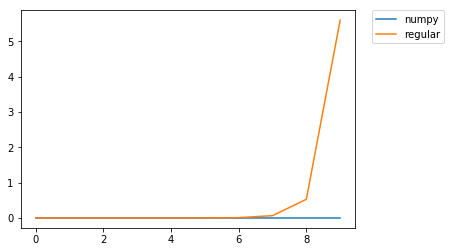

In [3]:
# Fot the Determinant using regular method -
# it is taking very long time to plot the graph for the given range of 100 to 800
# so, i ploted the graph in the range of 1 to 10 for regular Determinant and compared it with numpy.

import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

#Determinant using recursive method
def Minor(n,i,j):
    return [row[:j] + row[j+1:] for row in (n[:i]+n[i+1:])]

def Det(n):
    if len(n) == 1:
        return n[0][0]
   
    elif len(n) == 2:
        return n[0][0]*n[1][1]-n[0][1]*n[1][0]
    
    else:
        d = 0
        for x in range(len(n)):
            d += ((-1)**x)*n[0][x]*Det(Minor(n,0,x))
        return d

t2=[]
for r in range(1,11,1):
    s1=time.time()
    n= [[np.random.randint(1,100) for i in range(r)] for j in range(r)]
    d = Det(n)
    e1=time.time()
    t2.append(e1-s1)
    
    
#Determinant using numpy    
A={}
det1={}
det2={}
x=1
for i in range(1,11,1):
    A[x]= np.random.randint(1,100,(i,i))
    x+=1

tlist2=[]
for j in range(1,11,1):
    s1=time.time()
    det2[j]=np.linalg.det(A[j])
    e1=time.time()
    tlist2.append(e1-s1)
    
    
x=list(range(0,10))
plt.plot(x,tlist2,label="numpy")
plt.plot(x,t2,label="regular")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

DETERMINANT: Determinant using regular method in python is a time taking process. It can be observed from the above graph that
to find the Determinant of a 10X10 matrix using regular method, it took more than 5 seconds(also the graph is increasing at a high rate). 
By this we can estimate the time it will take to calculate the determinant of a 100X100 matrix and 800X800 matrix. whereas, using numpy 
the determinant can be calculated very easily and in a short span of time.

C:\Users\harik\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1821: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


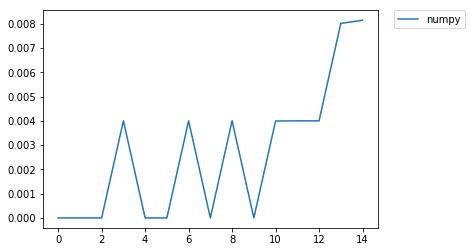

In [20]:
# Determinant using only numpy in the range of 100 to 800. 
# Regular method is taking too long to plot the graph in the given range(100 to 800)

import numpy as np
import time
from scipy import linalg
import matplotlib.pyplot as plt
%matplotlib inline
A={}
det1={}
det2={}
x=1
for i in range(100,801,50):
    A[x]= np.random.random((i,i))
    x+=1

tlist2=[]
for j in range(1,16,1):
    s1=time.time()
    det2[j]=np.linalg.det(A[j])
    e1=time.time()
    tlist2.append(e1-s1)
    
    
x=list(range(0,15))
plt.plot(x,tlist2,label="numpy")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


From the above graph, it can be observed using numpy the determinant of a 800X800 matrix can be calculated in just 0.008 seconds

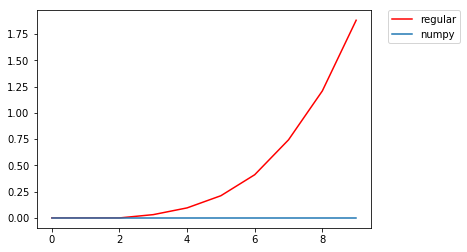

In [1]:
# Fot the Matrix Multiplication using regular method -
# it is taking long time to plot the graph for the given range of 100 to 1500
# so, i ploted the graph in the range of 1 to 300 for regular multiplication and compared it with numpy.

import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline
A={}
B={}
result={}
finalresult={}
x=1
for i in range(1,101,10):
    s1=time.time()
    A[x]= np.random.randint(1, 100, (i,i))
    B[x]=A[x]
    result[x]=np.zeros((i,i))
    x+=1

# Multiplication Using regular method
timelist1 = []
for c in range(1,11,1):
    final=result[c]
    finalA=A[c]
    finalB=B[c]
    for i in range(len(finalA)):
        for j in range(len(finalB[0])):
            for k in range(len(finalB)):
                final[i][j] += finalA[i][k]*finalB[k][j]
    finalresult[c]=final
    e1=time.time()
    timelist1.append(e1-s1)    

# Multiplication using numpy
tlist1=[]
for d in range(1,11,1):
    s2=time.time()
    finalresult[d] = np.matmul(A[d], B[d])
    e2=time.time()
    tlist1.append(e2-s2)
    

x=list(range(0,10))
plt.plot(x,timelist1,color='r',label="regular")
plt.plot(x,tlist1,label="numpy")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    


MULTIPLICATION: using numpy matrix multiplication can be calculated in less time, but a regular method takes long time (Increasing exponentially).It can be observed from the above that regular method took about 1.75 seconds for a 100X100 matrix. where as using numpy it just took a fraction of a second.

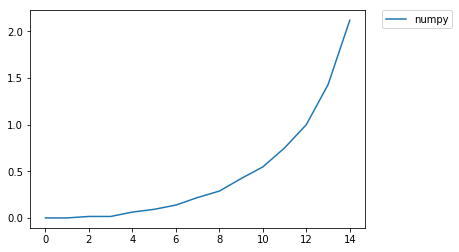

In [9]:
# Matrix Multiplication using only numpy in the range of 100 to 1500. 
# Regular method is taking too long to plot the graph in the given range(100 to 1500)

import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline
A={}
B={}
result={}
finalresult={}
x=1
for i in range(100,1501,100):
    A[x]= np.random.randint(1, 100, (i,i))
    B[x]=A[x]
    result[x]=np.zeros((i,i))
    x+=1
      
tlist1=[]
for d in range(1,16,1):
    s2=time.time()
    finalresult[d] = np.matmul(A[d], B[d])
    e2=time.time()
    tlist1.append(e2-s2)
    

x=list(range(0,15))
plt.plot(x,tlist1,label="numpy")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



using numpy it just took 2 seconds to calculate the multiplication of a 1500X1500 Matrix. Also, we can observe the graph 
is increasing exponentially